In [2]:
import nltk
import numpy as np
import enchant
import pandas as pd
import os
import re
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')      
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Micha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Micha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Micha\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Micha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [5]:
data = []
# ścieżka do plików
p = os.getcwd()+'\data'
for folder in os.listdir(p):
    mails = os.listdir(p + '/' + folder)
    for mail in mails:
        path = p + '/' + folder + '/' + mail
        with open(path) as file:
            text = file.read()
        data.append([text, folder])
df = pd.DataFrame(data)

In [7]:
df

,0,1
0,Xref: cantaloupe.srv.cs.cmu.edu comp.graphics:...,comp.graphics
1,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,comp.graphics
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,comp.graphics
3,Xref: cantaloupe.srv.cs.cmu.edu comp.human-fac...,comp.graphics
4,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,comp.graphics
...,...,...
4995,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
4996,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
4997,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
4998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [100]:
def Preprocesing(data, lematize = False, stem = True):
    
    # Bierzemy wszystko po pierwszych 2 enterach czyli po opisie technicznym
    formated = data.split('\n\n')[1:]
    formated = ' '.join(formated).lower() # zamiana na małe litery
    
    # Wyrzucamy wszystkie wyrażenia słowo.słowo(ścieżki itp.) i adresy mail 
    formated = re.sub('((\w+\.)+\w+)|\w+@\w+','', formated)
    
    # Podmieniamy wszystkie liczby, ciągi liczb na spacje  i "_"
    formated =re.sub('\W|\d|_'," ", formated)
    
    # Tokenizacja
    tokenizer = RegexpTokenizer(r"\w+")
    formated= tokenizer.tokenize(formated)
    
    # Usuwamy stop wordsy
    stop_words = set(stopwords.words('english'))
    formated = [word for word in formated if not word in stop_words and len(word) > 1]
    
    # Lematyzacja
    if(lematize == True):
        lemmatizer = WordNetLemmatizer()
        formated = [lemmatizer.lemmatize(word) for word in formated] 
    
    # Stemming    
    if (stem == True):
        ps = PorterStemmer() 
        formated = [ps.stem(word) for word in formated] 
        
    return formated

In [101]:
from sklearn.model_selection import train_test_split

df = pd.DataFrame(data)

X_train, X_test, y_train, y_test = train_test_split(
    df[0],
    df[1],
    test_size=0.4, random_state=213)

# Preprocesing
X_train = [Preprocesing(text) for text in X_train]
X_train

[['evid',
  'independ',
  'fbi',
  'indic',
  'branch',
  'davidian',
  'set',
  'fire',
  'survivor',
  'said',
  'press',
  'see',
  'anyth',
  'unfortun',
  'preced',
  'govern',
  'save',
  'children',
  'roast',
  'aliv',
  'preced',
  'religi',
  'self',
  'imol',
  'well',
  'still',
  'wonder',
  'govern',
  'leav',
  'alon'],
 ['tri',
  'configur',
  'zsoft',
  'pc',
  'paintbrush',
  'iv',
  'use',
  'logitech',
  'scanman',
  'hand',
  'scanner',
  'get',
  'paintbrush',
  'acknowledg',
  'scanner',
  'anybodi',
  'use',
  'paintbrush',
  'scanner',
  'help',
  'thank',
  'lui',
  'nobrega',
  'file',
  'bank',
  'bb',
  'pcboard',
  'usr',
  'hst',
  'ds',
  'node',
  'rime',
  'internet',
  'largest',
  'clipper',
  'file',
  'collect',
  'world'],
 ['post',
  'someon',
  'els',
  'pleas',
  'respond',
  'address',
  'list',
  'pleas',
  'also',
  'excus',
  'duplic',
  'messag',
  'crosspost',
  'thank',
  'request',
  'idea',
  'applic',
  'remot',
  'sens',
  'databas',

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer

# max i min trzeba zhiperparametryzować wyrzucilismy slowa ktore istnieja w mniej niz 1 procencie tekstow i wiecej niz 0.2

tf_idf = [" ".join(text) for text in X_train]
vectorizer = TfidfVectorizer(strip_accents='unicode', stop_words='english', max_df = 0.2 ,min_df=0.01)
tf_idf = vectorizer.fit_transform(tf_idf)
tf_idf = pd.DataFrame(tf_idf.toarray(), columns = vectorizer.get_feature_names())
tf_idf

C:\Users\Micha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,ab,abil,abl,abort,absolut,acceler,accept,access,accid,accord,...,wrote,yanke,ye,yeah,year,yesterday,york,young,zero,zoolog
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.025562,0.144626,0.000000,0.0,...,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.051644,0.000000,0.000000,0.0,...,0.0465,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.215361,0.0,...,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000
2996,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000
2997,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000
2998,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000


In [118]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN().fit(X)

<AxesSubplot:ylabel='Count'>

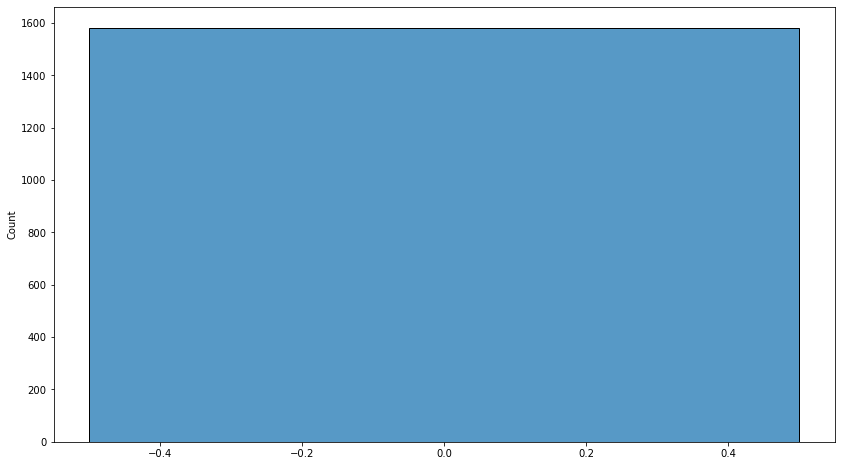

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8)).clf()
sns.histplot(clustering.labels_)

In [116]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters =  5, random_state = 0)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=0)

<AxesSubplot:ylabel='Count'>

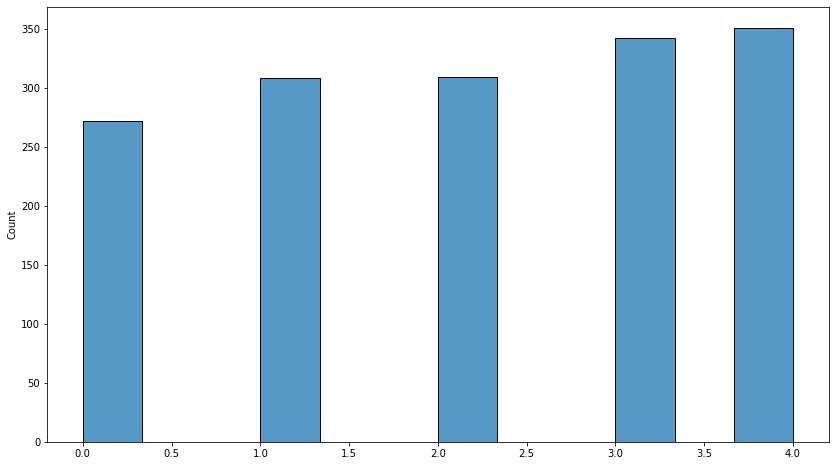

In [117]:
plt.figure(figsize=(14,8)).clf()
sns.histplot(kmeans.labels_)

In [133]:
## Tu jeszcze kombinuje bo wcześniej głupot narobiłem

In [130]:
# Pewnie do śmieci
def modeling(df, number_of_topics):
    from sklearn.feature_extraction.text import CountVectorizer
    
    #matrix = CountVectorizer()
    #X = matrix.fit_transform(df).toarray()
    #b_of_words = pd.DataFrame(X, columns = matrix.get_feature_names_out())
    #tfidf = TfidfVectorizer(lowercase=True,
     #                   stop_words='english',
    #                    ngram_range = (1,1))

    # Fit and Transform the documents
    train_data = tfidf.fit_transform(df)  
    lsa = TruncatedSVD(n_components=number_of_topics, random_state=42)

    # Fit SVD model on data
    lsa.fit_transform(train_data)
    #b_of_words = df.columns
    #terms = tfidf.get_feature_names_out()

    for index, component in enumerate(lsa.components_):
        zipped = zip(terms, component)
        top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:10]
        top_terms_list=list(dict(top_terms_key).keys())
        print("Topic "+str(index)+": ",top_terms_list)
        
    m1= np.array(lsa.components_.T)
    m2= np.array(b_of_words)
    X = np.dot(m2,m1)
    X = pd.DataFrame(X)
    return X

In [131]:
X = modeling(tf_idf, 10)

Topic 0:  ['truli', 'liter', 'subject', 'explor', 'plug', 'jack', 'lack', 'tank', 'self', 'loui']
Topic 1:  ['chip', 'greatli', 'necessari', 'highway', 'forget', 'compar', 'circl', 'edu', 'contact', 'test']
Topic 2:  ['account', 'red', 'special', 'south', 'appropri', 'imag', 'manual', 'establish', 'aid', 'bigger']
Topic 3:  ['disk', 'soon', 'bit', 'lord', 'instruct', 'everyth', 'dodger', 'materi', 'kendig', 'slow']
Topic 4:  ['high', 'iron', 'polici', 'domain', 'group', 'publish', 'gamma', 'fall', 'injuri', 'gm']
Topic 5:  ['strongli', 'il', 'practic', 'tommi', 'thing', 'distribut', 'smooth', 'alink', 'place', 'fact']
Topic 6:  ['australia', 'particular', 'directli', 'il', 'michael', 'unlik', 'middl', 'warn', 'uk', 'lie']
Topic 7:  ['hp', 'thread', 'featur', 'essenti', 'want', 'design', 'quit', 'draw', 'au', 'heard']
Topic 8:  ['reduc', 'illeg', 'anybodi', 'strike', 'chapter', 'technolog', 'transmiss', 'war', 'kept', 'th']
Topic 9:  ['disagre', 'forc', 'directori', 'daniel', 'identifi'

TypeError: can't multiply sequence by non-int of type 'float'

In [132]:
tf_idf

,ab,abil,abl,abort,absolut,acceler,accept,access,accid,accord,...,wrote,yanke,ye,yeah,year,yesterday,york,young,zero,zoolog
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.025562,0.144626,0.000000,0.0,...,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.051644,0.000000,0.000000,0.0,...,0.0465,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.215361,0.0,...,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000
2996,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000
2997,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000
2998,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000
